In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata('MNIST original', data_home='.')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=36, whiten=True)

In [6]:
X_pca = pca.fit_transform(mnist.data / 255)

In [7]:
X_pca.shape

(70000, 36)

In [8]:
trainX,testX,trainY,testY = train_test_split(X_pca,mnist.target)

In [9]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
random_forest = RandomForestClassifier(n_estimators=40)

In [10]:
random_forest.fit(trainX,trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
from sklearn.metrics import accuracy_score
pred = random_forest.predict(testX)
print (accuracy_score(testY,pred))

0.950285714286


In [13]:
import matplotlib.pyplot as plt

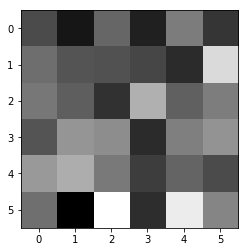

In [23]:
plt.imshow(testX[1].reshape(6,6),cmap=plt.cm.binary)
plt.show()

In [22]:
pred

array([ 1.,  9.,  7., ...,  3.,  9.,  5.])

In [25]:
testY[1]

9.0

In [26]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

In [27]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


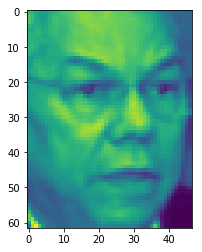

In [30]:
plt.imshow(faces.data[0].reshape(62,47))
plt.show()

In [31]:
faces.target

array([1, 3, 3, ..., 7, 3, 5], dtype=int64)

In [32]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'],
      dtype='<U17')

In [46]:
#Good for images
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(144)
pca.fit(faces.data)

C:\Users\ZekeLabs\Anaconda3-N\lib\site-packages\sklearn\utils\deprecation.py:57: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


RandomizedPCA(copy=True, iterated_power=2, n_components=144,
       random_state=None, whiten=False)

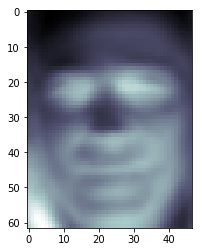

In [47]:
plt.imshow(pca.components_[3].reshape(62,47), cmap='bone')
plt.show()

In [48]:
components = pca.transform(faces.data)

In [49]:
components.shape

(1348, 144)

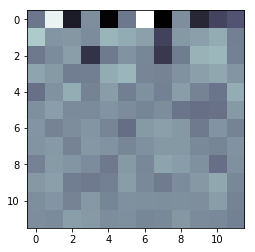

In [50]:
plt.imshow(components[3].reshape(12,12), cmap='bone')
plt.show()

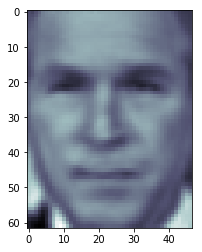

In [54]:
plt.imshow(pca.inverse_transform(components[3]).reshape(62,47),cmap='bone')
plt.show()